## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math, string, glob
from datetime import datetime
import numpy as np
import functools

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf
import tensorflow_datasets as tfds
import tensorflow_text as tf_text

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import text_functions as txt_fcn
importlib.reload(txt_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Istnieje, niekompletny, zbiór standardowych operacji jakie wykonujemy na różnego typu danych zanim zostaną użyte jako wejście do modelu.
API Keras dostarcza gotowych warstw wykonujących wiele z tych [operacji](https://www.tensorflow.org/guide/keras/preprocessing_layers).
W tym notatniku użyjemy kilku z nich dla różnych rodzajów danych: **numerycznych**, **tekstowych**, **obrazów**.

## Dane numeryczne

### Normalizacja

Standardowa operacja, jaką wykonujemy na danych numerycznych przez podaniem ich na wejście modelu to normalizacja.
Normalizacja powoduje że rząd wielkości wag jest podobny dla wszystkich cech, a same wagi nei są zbyt duże.

```Python

normalization = tf.keras.layers.Normalization(mean, variance) # Normalizacja danych do średniej mean i wariancji wariance
                                                               # domyślnie mean=0, variance=1
                                                               # normalizacja przebiega dla każdej cechy oddzielnie
                                                               # wymaga ustalenia współczynników normalizacji przez metodę adapt(x)
normalization.adapt(x)                                                             
```


**Proszę:**

* wygenerować zbiór `(n,4)` liczb pochodzących z rozkładu płaskiego w zakresach `[[-5,5],[-4,2],[2,2]]`
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w zbiorze
* znormalizować dane do zakresu `[0,1]` dla każdej cechy oddzielnie
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w znormalizowanym zbiorze
* sprawdzić czy normalizacja zadziałała zgodnie z oczekiwaniem

In [10]:
"rozwiazanie Kalinowskiego, inny rodzaj normalizacji do wariancji 1, srednia zero"
n = 10_00

x = tf.random.uniform([n, 3])
scales = np.array([[-5, 5], [-4, 2], [-2, 2]])
ranges = scales[:, 1] - scales[:, 0]
x = x * ranges + scales[:, 0]
print("min", tf.math.reduce_min(x, axis=0))
print("max", tf.math.reduce_max(x, axis=0))
print("mean", tf.math.reduce_mean(x, axis=0))

normalization = tf.keras.layers.Normalization()
normalization.adapt(x)
x_norm = normalization(x)
print("min", tf.math.reduce_min(x_norm, axis=0))
print("max", tf.math.reduce_max(x_norm, axis=0))
print("mean", tf.math.reduce_mean(x_norm, axis=0))


min tf.Tensor([-4.9931693 -3.9901044 -1.9991713], shape=(3,), dtype=float32)
max tf.Tensor([4.9746275 1.9872704 1.992805 ], shape=(3,), dtype=float32)
mean tf.Tensor([-0.10716412 -1.0736338   0.04423333], shape=(3,), dtype=float32)
min tf.Tensor([-1.733331  -1.6329794 -1.7450999], shape=(3,), dtype=float32)
max tf.Tensor([1.8027868 1.7138501 1.664111 ], shape=(3,), dtype=float32)
mean tf.Tensor([ 1.1801720e-08  2.2584200e-07 -4.3511392e-08], shape=(3,), dtype=float32)



### Dyskretyzacja

Czasami użyteczny jest podział danych numerycznych na kategorie - **dyskretyzacja**.
W sytuacji, gdy nie potrzebujemy dużej rozdzielczości wartości zmiennoprzecinkowe możemy podzielić
np. na `małe`, `średnie` i `duże`.
Redukcja rozdzielczości z poziomu zmiennoprzecinkowego do listy kategorii może też ułatwić trening.

```Python

discretization = tf.keras.layers.Discretization(num_bins, bin_boundaries, output_mode)
                 # Zamiana zmiennej ciągłej na dyskretną w postaci:
                 # output_mode = int - numer przedziału (wartość domyślna)
                 #               one_hot - wektor typu kodowania gorącojedynkowego
                 # num_bins - liczba przedziałów (wymaga zawołania metody adapt(x))
                 # bin_boundaries - zakresy przedziałów
```

**Proszę:**

* zdyskretyzować dane z poprzedniej komórki do 10 przedziałów
* narysować histogram numerów przedziałów dla **wszystkich** cech

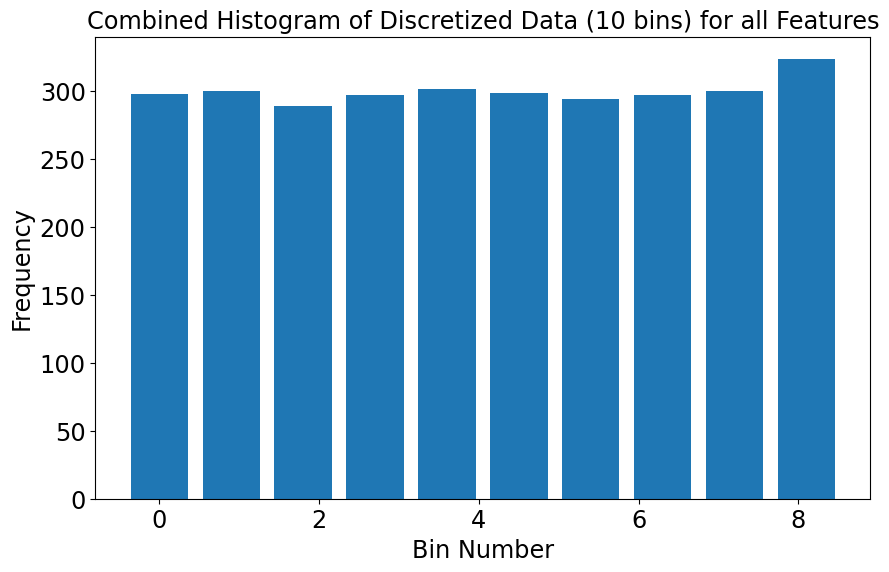

In [16]:
discretization_layer = tf.keras.layers.Discretization(num_bins=10)
discretization_layer.adapt(x)
discretized_data = discretization_layer(x)

# # Plot histograms for each feature
# fig, axes = plt.subplots(1, x.shape[1], figsize=(15, 5))
# fig.suptitle("Histogram of Discretized Data (10 bins)")

# for i in range(x.shape[1]):
#     axes[i].hist(discretized_data[:, i].numpy(), bins=10, align='left', rwidth=0.8)
#     axes[i].set_title(f'Feature {i+1}')
#     axes[i].set_xlabel('Bin Number')
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
# plt.show()

plt.figure(figsize=(10, 6))
# plt.hist(discretized_data.numpy().flatten(), bins=10, align='left', rwidth=0.8)
plt.hist(tf.reshape(shape = (-1,), tensor = discretized_data), align='left', rwidth=0.8) #Kalinowski line
plt.title("Combined Histogram of Discretized Data (10 bins) for all Features")
plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.show()

## Obrazy

**Proszę:**

* korzystając z biblioteki `tensorflow_datasets` załadować zbiór `imagenette/160px`
* narysować kilka przykładowych rysunków

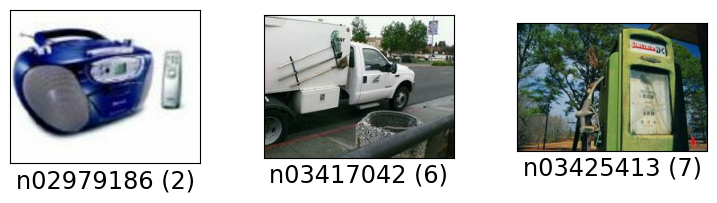

In [24]:
# Load the imagenette/160px dataset
ds, ds_info = tfds.load('imagenette/160px', with_info=True, split = 'train')
fig = tfds.show_examples(ds, ds_info, rows = 1, cols = 3)


### Skalowanie

Zmiana rozdzielczości - skalowanie obrazu. Skalowanie wymaga podania algorytmu interpolacji, pozwalającego
na obliczenie wartości pikseli w nowym obrazie.

```Python
tf.keras.layers.Resizing(
    height, width,                # szerokość i wysokość nowego obrazu
    interpolation='bilinear',     # algorytm interpolacji
    crop_to_aspect_ratio=False,   # przycinanie obrazu w celu uzyskania
                                  # tego samego stosunku szerokość/długość
                                  # jak w obrazie oryginalnym
)
```


## Przycinane

z całego obrazu jest wycinany fragment, `ramka`:


```Python
tf.keras.layers.CenterCrop(
    height, width              # szerokość i wysokość prostokąta wycinającego
                               # fragment w środku obrazu
)
```

Przycinanie w losowym miejscu może być użyte do wzbogacania próbki, poprzez generację
losowych fragmentów obrazu - ang. `augmenting`. Warstwy wykonujące losowe operacje na obrazach
są domyślnie aktywne tylko w czasie treningu.

```Python
tf.keras.layers.RandomCrop(
    height, width, seed=None,  # szerokość i wysokość prostokąta wycinającego
                               # fragment w losowym miejscu
                               #
)
```



### Obrót

```Python
tf.keras.layers.RandomRotation(
    factor,                         # zakres obrotu w jednostkach 2pi: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po obrocie obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```




### Translacja

```Python
tf.keras.layers.RandomTranslation(
    height_factor,                  # względny współczynnik przesunięcia w pionie: (min, max)
    width_factor,                   # względny współczynnik przesunięcia w poziomie: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po przesunięciu obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```


**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* skalowaniu obszaru do rozdzielczości `(320,320)`
* wypisać na ekran rozdzielczość pierwszego przykładu

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o odpowiednią warstwę
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

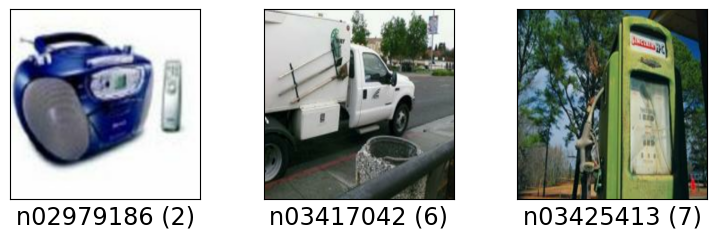

Shape of the first resized image: (320, 320, 3)


In [35]:
resizing_layer = tf.keras.layers.Resizing(320, 320)

# jedna opcja
def resize_image(item):
    image = item['image']
    label = item['label']
    # Ensure the image data type is float32 before resizing
    image = tf.cast(image, tf.float32)
    resized_image = resizing_layer(image)
    return resized_image, label

resized_ds = ds.map(resize_image)
#druga opcja
resized_ds = ds.map(lambda item: (resizing_layer(tf.cast(item['image'], tf.float32)), item['label']))

# trzecia opcja xd
resized_ds = ds.map(lambda x: {"image": tf.cast(resizing_layer(tf.cast(x["image"], tf.float32)), tf.uint8), "label": x["label"]})
tfds.show_examples(resized_ds, ds_info, rows = 1, cols = 3)

# Print the shape (resolution) of the first example
first_resized_image, _ = next(iter(resized_ds))
print(colored("Shape of the first resized image:", "blue"), first_resized_image.shape)

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* przycinaniu do obszaru centralnego o rozmiarze `(64,64)`

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o `tf.keras.layers.CenterCrop`
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

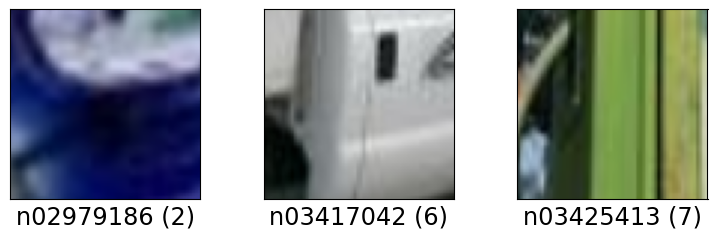

In [41]:
res = 64
crop_layer = tf.keras.layers.CenterCrop(res, res, dtype=tf.uint8)
ds_random_crop = resized_ds.map(lambda x: {'image': crop_layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds_random_crop, ds_info, rows=1, cols=3)

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu przycinaniu do obszaru o rozmiarze `(64,64)`

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.


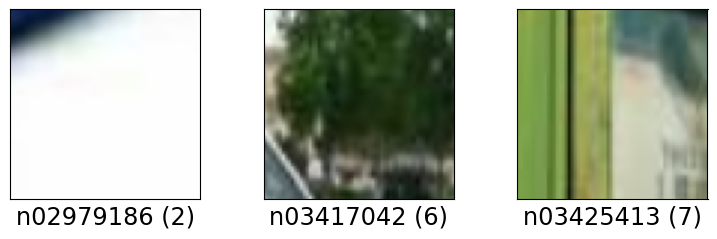

In [45]:
res = 64
crop_layer = tf.keras.layers.RandomCrop(res, res, dtype=tf.uint8)
ds_random_crop = resized_ds.map(lambda x: {'image': crop_layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds_random_crop, ds_info, rows=1, cols=3)

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu obrotowi w zakresie $\pm \pi/4$
* puste miejsca po obrocie proszę wypełnić kolorem czarnym

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.



Random examples from the randomly rotated dataset:


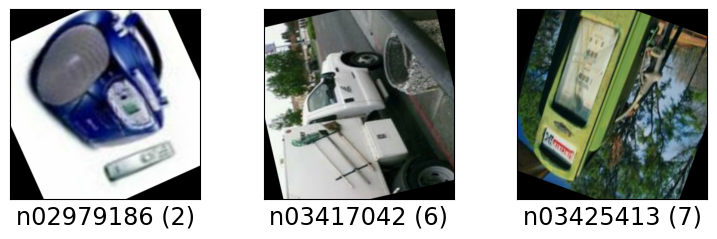

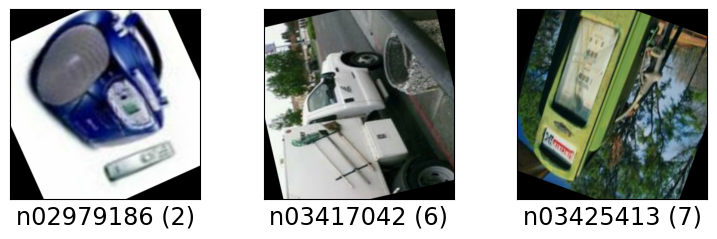

In [51]:
random_rotation_layer = tf.keras.layers.RandomRotation(
    factor=(-np.pi/4, np.pi/4),
    fill_mode='constant',
    fill_value=0,
    interpolation='bilinear' # You can choose a suitable interpolation method
)
ds_random_rotate = resized_ds.map(lambda x: {
    'image': tf.cast(random_rotation_layer(tf.cast(x["image"], tf.float32)), tf.uint8),
    'label': x["label"]
})
print(colored("\nRandom examples from the randomly rotated dataset:", "blue"))
tfds.show_examples(ds_random_rotate, ds_info, rows=1, cols=3)

## Dane tekstowe

Zamiana tekstu na postać cyfrową może być wykonana na wiele sposobów. Dwa najbardziej popularne to:
* **wektoryzacja (ang. text vectorization)** - każdemu znacznikowi (ang. `token`) jest przypisana liczba całkowita, indeks w słowniku.
                 Odwzorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest ustalane na podstawie zawartości zbioru danych.

* **zanurzanie (ang. embedding)** - każdemu znacznikowi jest przypisany n-wymiarowy wektor liczb zmiennoprzecinkowych.
    Odwzorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest znajdowanie w czasie treningu modelu.

### Wektoryzacja

```Python
tf.keras.layers.TextVectorization(
    max_tokens=None,                           # maksymalna liczba znaczników w słowniku
    standardize='lower_and_strip_punctuation', # algorytm standaryzacji tekstu
    split='whitespace',                        # algorytm podziału na słowa
    ngrams=None,                               # algorytm podziału słów na n-literowe fragmenty
    output_mode='int',                         # typ wyjścia   
    output_sequence_length=None,               # maksymalna długość zakodowanej sekwencji "zdania"
    pad_to_max_tokens=False,                   # czy dopełniać sekwencję zerami do maksymalnej długości
    vocabulary=None                            # słownik. Jeśli nie jest podany generacja słownika wymaga zawołania
                                               # metody adapt()
)
 ```

 Znaczniki nie występujące w słowniku otrzymają ten sam indeks oznaczający znacznik OOV (`ang. out of vocabulary`)

**Proszę:**

* zbudować słownik na tekście `wksf/Korpus_surowy` wczytywanym w ramach zadania domowego z poprzedniego notatnika
* zwektoryzować teskt `Król zasiada na tronie.`
* wypisać na ekran zwektoryzowaną postać
* przeprowadzić operację odwrotną - z postaci zwektoryzowanej odtworzyć tekst
* powtórzyć procedurę dla tekstu `Ania ma małego kotka.`

**Wskazówki**:
* słownik utworzony przez warstwę `tf.keras.layers.TextVectorization` uzyskujemy przez metodę `get_vocabulary()`
* z elementów sekwencji `words` można utworzyć napis w następujący sposób:
```Python
sentence = " ".join(words)
```


In [55]:
import text_functions as txt_fcn

filePath = "/content/Korpus_surowy"
dataset = txt_fcn.load_wksf_dataset(filePath)

pass

In [69]:
text_vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=1000000,                           # Kalinowski chcial 1e6
    output_mode = "int"
)
# Adapt the layer to the dataset to build the vocabulary
print(colored("Building vocabulary...", "blue"))
text_vectorization_layer.adapt(dataset.batch(128)) # Batching can speed up adaptation

# Get the vocabulary
vocabulary = text_vectorization_layer.get_vocabulary()


Building vocabulary...


In [70]:
print(colored(f"\nFirst 100 elements of the vocabulary (size: {len(vocabulary)}):", "blue"))
print(vocabulary[:100])


First 100 elements of the vocabulary (size: 86505):
['', '[UNK]', np.str_('w'), np.str_('i'), np.str_('się'), np.str_('nie'), np.str_('na'), np.str_('z'), np.str_('do'), np.str_('to'), np.str_('że'), np.str_('a'), np.str_('o'), np.str_('jest'), np.str_('jak'), np.str_('co'), np.str_('tak'), np.str_('ale'), np.str_('po'), np.str_('od'), np.str_('tym'), np.str_('już'), np.str_('za'), np.str_('przez'), np.str_('tylko'), np.str_('dla'), np.str_('tego'), np.str_('ja'), np.str_('czy'), np.str_('pan'), np.str_('mnie'), np.str_('jeszcze'), np.str_('ma'), np.str_('są'), np.str_('może'), np.str_('przy'), np.str_('ze'), np.str_('mi'), np.str_('ten'), np.str_('roku'), np.str_('jego'), np.str_('było'), np.str_('bo'), np.str_('będzie'), np.str_('tu'), np.str_('ich'), np.str_('tej'), np.str_('sobie'), np.str_('bardzo'), np.str_('oraz'), np.str_('go'), np.str_('tysiąc'), np.str_('więc'), np.str_('które'), np.str_('no'), np.str_('tych'), np.str_('był'), np.str_('jej'), np.str_('nawet'), np.str_('być')

In [72]:
# Text to vectorize
text_to_vectorize = "Król zasiada na tronie."

vectorized_text = text_vectorization_layer(tf.constant(text_to_vectorize))

# Print the vectorized form
print(colored(f"Original text: {text_to_vectorize}", "blue"))
print(colored("Vectorized form:", "blue"), vectorized_text.numpy())


Original text: Król zasiada na tronie.
Vectorized form: [ 1413 40409     6 26158]


In [78]:
text = "Ania ma małego kotka."
vectorized_text = text_vectorization_layer([text])

def get_text_from_vectorized(vectorized_sequence, vocabulary):
    indices = vectorized_sequence.numpy().flatten()
    words = [vocabulary[index] for index in indices]
    return " ".join(words)

reconstructed_text1 = get_text_from_vectorized(vectorized_text, vocabulary)
print(colored(f"Reconstructed text from vectorized form 1: {reconstructed_text1}", "blue"))



Reconstructed text from vectorized form 1: ania ma małego [UNK]


### Zanurzanie


```Python
tf.keras.layers.Embedding(
    input_dim,                          # rozmiar słownika - liczba znaczników ("tokenów")
    output_dim,                         # wymiar reprezentacji  
)
```

Warstwa zanurzająca przypisuje wartość zmiennoprzecinkową każdemu znacznikowi.
Taką operację można reprezentować przez macierz `(output_dim, input_dim)` która działa na wektor gorącojedynkowy o długości `(input_dim)`
i produkuje reprezentację zmiennoprzecinkową o długości `output_dim`
Tutaj `output_dim=3`:

$$
\huge{
\begin{bmatrix}
a_{0} & b_{0} & c_{0} & \dots \\
a_{1} & b_{1} & c_{1} & \dots \\
a_{2} & b_{2} & c_{2} & \dots \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
0 \\
0 \\
\dots \\
0
\end{bmatrix}
=
\begin{bmatrix}
a_{0} \\
a_{1} \\
a_{2}
\end{bmatrix}
}
$$
Warstwa `tf.keras.layers.Enbedding()` realizuje tę operację w sposób zoptymalizowany.
Macierz zanurzania jest zwykle zmieniana w trakcie treningu modelu który ją zawiera, więc nie jest to standardowa warstwa wstępnego przetwarzania.


**Proszę:**

* zwektoryzować teskt `Król zasiada na tronie.`
* zwektoryzowaną postać podać na wejście warstwy zanurzającej z `nDims = 4`
* wypisać na ekran obie postacie tekstu

In [83]:
text_to_embed = "Król zasiada na tronie."

vectorized_text = text_vectorization_layer([text_to_embed])

print(colored(f"Original text: {text_to_embed}", "blue"))
print(colored("Vectorized form:", "blue"), vectorized_text.numpy())

# Define the Embedding layer
embedding_dim = 4
nTokens = len(vocabulary)
embedding_layer = tf.keras.layers.Embedding(input_dim=nTokens, output_dim=embedding_dim)

embedded_text = embedding_layer(vectorized_text)

# Print the embedded form
print(colored("\nEmbedded form:", "blue"), embedded_text.numpy())
print(colored("\nEmbedded shape:", "blue"), embedded_text.numpy().shape)

Original text: Król zasiada na tronie.
Vectorized form: [[ 1413 40409     6 26158]]

Embedded form: [[[ 0.00757214 -0.03737622 -0.0414317  -0.04841749]
  [-0.03761107 -0.03792381 -0.0485501  -0.03668729]
  [-0.04979774  0.01024722 -0.01878872 -0.01649084]
  [-0.04032445 -0.00096874  0.03039726  0.0465445 ]]]

Embedded shape: (1, 4, 4)


### Podział na n-gramy

W czasie analizy tekst zwykle dzieli się na fragmenty zawierające `n` znaczników (ang. `tokens`) - n-gramy.
Podzielimy zdania wczytane z korpusu języka polskiego na odcinki o długości `n` wyrazów. Skorzystamy z gotowych funkcji służących
do operowania na napisach dostępnych w dedykowanej bibliotece `tensorflow_text`

* podział tekstu na fragmenty (tutaj wyrazy oddzielone spacją):
```Python
tensorflow_text.WhitespaceTokenizer().tokenize(text)
```

* tworzenie grup o wybranej długości z użyciem biegnącego okna - grupy się przekrywają za wyjątkiem ostatniego wyrazu, czyli krok okna ang. `stride`
wynosi 1
```Python
tensorflow_text.tf_text.sliding_window(data,       # lista znaczników        
                                       width,      # szerokość okna przebiegającego listę
                                       axis=-1,    # wymiar, wzdłuż którego biegnie okno
                                       name=None   # nazwa funkcji
```

In [93]:
import tensorflow_text as tf_text
import functools

# load the dataset
filePath = "/content/Korpus_surowy"
dataset = txt_fcn.load_wksf_dataset(filePath)

# split lines into words
dataset = dataset.map(tf_text.WhitespaceTokenizer().tokenize)

# remove empty lines
dataset = dataset.filter(lambda x: tf.size(x) > 0)

# fix all function arguments except for the input data
window_size = 5
slidingWindowWithWidth = functools.partial(tf_text.sliding_window, width=window_size)

# apply the sliding window to each line.
# this will priduce a tensor of shape (n, width) for each line,
# where n in the number of groups of words of words of width length
dataset = dataset.map(slidingWindowWithWidth)

print(colored("First example:", "blue"))
for item in dataset.take(1):
    print(colored("Text: ", "blue"), item.numpy())

First example:
Text:  [[b'Co' b'my\xc5\x9bla\xc5\x82' b'ten' b'artysta?' b'..']
 [b'my\xc5\x9bla\xc5\x82' b'ten' b'artysta?' b'..' b'No,']
 [b'ten' b'artysta?' b'..' b'No,' b'ewentualnie,']
 [b'artysta?' b'..' b'No,' b'ewentualnie,' b'prawdopodobnie']
 [b'..' b'No,' b'ewentualnie,' b'prawdopodobnie' b'..']
 [b'No,' b'ewentualnie,' b'prawdopodobnie' b'..' b'a']
 [b'ewentualnie,' b'prawdopodobnie' b'..' b'a' b'widzi']
 [b'prawdopodobnie' b'..' b'a' b'widzi' b'pan']
 [b'..' b'a' b'widzi' b'pan' b'kolega!']
 [b'a' b'widzi' b'pan' b'kolega!' b'No']
 [b'widzi' b'pan' b'kolega!' b'No' b'w\xc5\x82a\xc5\x9bnie!']
 [b'pan' b'kolega!' b'No' b'w\xc5\x82a\xc5\x9bnie!' b'Od']
 [b'kolega!' b'No' b'w\xc5\x82a\xc5\x9bnie!' b'Od' b'razu']
 [b'No' b'w\xc5\x82a\xc5\x9bnie!' b'Od' b'razu' b'm\xc3\xb3wi\xc5\x82em,']
 [b'w\xc5\x82a\xc5\x9bnie!' b'Od' b'razu' b'm\xc3\xb3wi\xc5\x82em,'
  b'\xc5\xbce']
 [b'Od' b'razu' b'm\xc3\xb3wi\xc5\x82em,' b'\xc5\xbce' b'co\xc5\x9b']
 [b'razu' b'm\xc3\xb3wi\xc5\x82em,' b'\x

Po podziale na n-gramy z jednego wiersza zrobiło się wiele fragmentów o długości `window_size`. Możemy je traktować jako paczki.
Operacja rozpaczkowania, `dataset.unbatch()` z powrotem przywróci zbiór do `postaci jeden przykład na wiersz`.

Rozpaczkowane wyrazy możemy z powrotem połączyć w fragmenty zdań.


In [94]:
# split the (n, width) tensor into (n) tensors of shape (width)
dataset = dataset.unbatch()

# merge words into sentence framgents
dataset = dataset.map(lambda x: tf.strings.reduce_join(x, separator=' '))

print(colored("First five five-word blocks:", "blue"))
for item in dataset.take(5):
    print(colored("Text: ", "blue"), item.numpy().decode())

First five five-word blocks:
Text:  Co myślał ten artysta? ..
Text:  myślał ten artysta? .. No,
Text:  ten artysta? .. No, ewentualnie,
Text:  artysta? .. No, ewentualnie, prawdopodobnie
Text:  .. No, ewentualnie, prawdopodobnie ..


**Proszę:**

* stworzyć słownik do wektoryzacji tekstu używając warstwy `tf.keras.layers.TextVectorization.adapt(...)`
* stworzyć zwektoryzowany zbiór danych: `dataset_vectorized` używając warstwy `tf.keras.layers.TextVectorization` i operacji `dataset.map()`
* zachować słownik w zmiennej `vocabulary` w postaci macierzy numpy
* usunąć przykłady z miej niż dwo wyrazami w zdaniu
* wypisać na ekran liczbę znaczników w słowniku
* wypisać na ekran pięć pierwszych przykładów w zwektoryzowanej postaci

**Wskazówka:**
* operacje na zbiorach danych można przyspieszyć wykonując je na paczkach:
```Python
dataset.batch(n).map(...).unbatch()
```

In [95]:

text_vectorization_layer = tf.keras.layers.TextVectorization(
    output_mode = "int"
)
text_vectorization_layer.adapt(dataset.batch(1024))

vocabulary = np.array(text_vectorization_layer.get_vocabulary())

print(colored(f"\nNumber of tokens in vocabulary: {len(vocabulary)}", "blue"))

dataset_vectorized = dataset.batch(1024).map(text_vectorization_layer, num_parallel_calls = tf.data.AUTOTUNE).unbatch()

print(colored("\nFirst five examples in vectorized form:", "blue"))
for item in dataset_vectorized.take(5):
    print(colored("Vectorized form:", "blue"), item.numpy())


dataset_vectorized = dataset_vectorized.filter(lambda x: tf.size(x) >= 2)



Number of tokens in vocabulary: 86504

First five examples in vectorized form:
Vectorized form: [  15 1843   39 6719    0]
Vectorized form: [1843   39 6719   63    0]
Vectorized form: [  39 6719   63 5179    0]
Vectorized form: [6719   63 5179 1137    0]
Vectorized form: [  63 5179 1137    0    0]


**Proszę:**

* przekształcić zwektoryzowany zbiór zawierający n-gramy do postaci `(cechy, etykieta)` gdzie:
    * **etykieta** - środkowy wyraz
    * **cechy** - wyrazy poza wyrazem środkowym

* przekształcenie powinno korzystać z metody `Dataset.map(...)` z użyciem własnej funkcji mapującej `map_fn(...)`
* założyć, że zbiór został podzielony na paczki, więc pojedynczy element ma kształt `(None,width)`
* wypisać na ekran cechy i etykiety dla pięciu przykładów

**Wskazówki**:
* można założyć że `n=5`
* można założyć, że środkowy wyraz ma indeks `2`


In [ ]:
###################################################
def map_fn(x):
...rozwiązanie...
    return features, label
###################################################
def print_item(batch, vocabulary, width=2):
    batch_index = 0
    item = (batch[0][batch_index], batch[1][batch_index])
    features = " ".join(vocabulary[item[0].numpy()[0:width]])
    label = vocabulary[item[1].numpy()]
    print(colored("Features", "blue"), end=" ")
    print(colored("(Label):", "red"), end=" ")

    print(features, end=" ")
    print(colored(label,"red"), end=" ")
    features = " ".join(vocabulary[item[0].numpy()[width:]])
    print(features)
###################################################

dataset_final = dataset_vectorized.batch(32).map(map_fn)

for item in dataset_final.take(5):
    print_item(item, vocabulary)
    print(colored("Vectorized form:", "blue"), )
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

**Proszę:**

* sprawdzić prędkość czytania finalnego zbioru danych korzystając z funkcji `benchmark`


In [ ]:
...rozwiązanie...
pass

# Zadanie domowe

**Proszę:**

* załadować tekst z pliku filePath = `shakespeare.txt'`

```Python

filePath = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
```

* wykonać `preprocessing` tekstu:
    * podział tekstu na fragmenty o długości pięciu wyrazów. Jeden przykład w nowym zbiorze powinien składać się jednego 5-wyrazowego fragmentu,
      a nie grupy fragmentów powstałej z podziału zdania na kawałki o długości pięciu wyrazów:
      ```
      
      Features (Label): before we proceed any further
      Features:  [128  33 123 639] Label:  1267
      ```
    * tokenizacja ze słownikiem ograniczonym do **1000** znaczników
    * podział fragmentów na etykietę (wyraz środkowy) i cechy (pozostałe wyrazy)
      

* wypisać na ekran pięć przykładów z zaznaczeniem cech i etykiety
* stworzyć warstwę zanurzającą ze `128` wymiarami
* wypisać na ekran pięć wyrazów najbliższych wyrazowi `man` w przestrzeni zanurzającej z odległością kosinusową:
```Python
cosine_similarity = tf.keras.losses.cosine_similarity(...)
```
* wypisać na ekran pięć słów najbliższych do sumy słów `mother` i `father` wykonanej w przestrzeni zanurzenia

**Wskazówki:**
* największe `n` wartości z listy można uzyskać funkcją `tf.math.top_k(...)`

<hr>

**Opcjonalnie:**

* przeprowadzić trening warstwy zanurzającej ze `128` wymiarami z użyciem algorytmu ciągłego worka słów - [`Continous Bag of Words (CBOW)`](https://d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html#the-continuous-bag-of-words-cbow-model) (wersja naiwna).

**Wskazówki:**

* obliczenie iloczynu skalarnego reprezentacji cech i wszystkich słów słownika wymaga zdefiniowania warstwy liczącej iloczyn skalarny:
```Python
class Dot(tf.keras.Layer):
    def call(self, x):
        dot_product = ...
        return dot_product

```
i użycia jej w definicji modelu.
<hr>

In [ ]:
# load text
...rozwiązanie...

# adapt vextorization layer
...rozwiązanie...

# split lines into words
...rozwiązanie...

# fix all tf_text.sliding_window function arguments except for the input data
...rozwiązanie...

# apply the sliding window to each line.
# this will produce a tensor of shape (n, width) for each line,
# where n in the number of groups of words with length width
...rozwiązanie...

# remove empty lines
...rozwiązanie...

# split the (n, width) tensor into (n) tensors of shape (width)
...rozwiązanie...

# merge words into sentence framgents
...rozwiązanie...

#Vectorize
...rozwiązanie...

for item in dataset_final.take(5):
    print_item(item, vocabulary, width=2)
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

In [ ]:
%time
# CBOW model training (optional)
...rozwiązanie...

#Evaluate non trained model
model.evaluate(dataset_final.take(16))

#Training
...rozwiązanie...
pass

In [ ]:
# Embeding space exploration - words similar to "man"
...rozwiązanie...
pass

In [ ]:
# Word arithmetics - words similar to "mother" + "father"
words = np.array(["father", "mother"])
...rozwiązanie...
pass

Odwzorowanie zanurzenia można zwizualizować z użyciem portalu [Embeding Projector](http://projector.tensorflow.org/?_gl=1*u2l7wh*_ga*MTg4NTM3NDUwOC4xNzA3OTg4NTU4*_ga_W0YLR4190T*MTcxNTI0MzQxOC44Ny4xLjE3MTUyNDQ5NzMuMC4wLjA.)
Na stronę trzeba załadować pliki `vectors.tsv` i `metadata.tsv` uzyskane z warstwy zanurzającej.

In [ ]:
def dump_embedding(model, vocabulary):
  import io
  out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
  weights = model.get_layer('embedding').get_weights()[0]
  for index, word in enumerate(vocabulary):
    if index == 0:
      continue  # skip 0, it's padding.
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
  out_v.close()
  out_m.close()

dump_embedding(model, vocabulary)